<a href="https://colab.research.google.com/github/ivanprogramacion/proyectoaluraPython/blob/main/versionDos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Precio promedio por categoria:
Computacion: $880000.00
Ropa: $14500.00
Electronica: $18500.00
Libros: $23333.33

Productos con valoracion > 6
Notebook (Computacion): 6.8
Celular (Electronica): 7.5
Computador (Computacion): 9.1


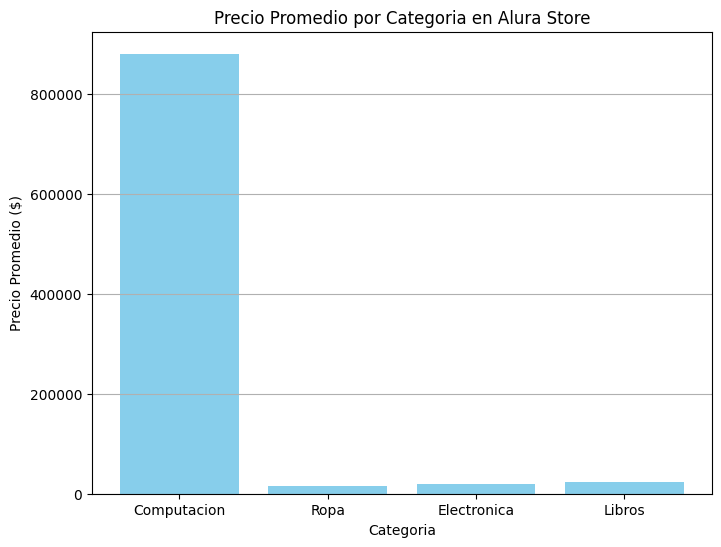

In [1]:
# Importar matplotlib para visualización
import matplotlib.pyplot as plt

# Paso 1: Crear lista de diccionarios
productos = [
    {"nombre": "Notebook", "precio": 780000, "valoracion": 6.8, "categoria": "Computacion"},
    {"nombre": "Camisa", "precio": 14000, "valoracion": 4.2, "categoria": "Ropa"},
    {"nombre": "Celular", "precio": 36000, "valoracion": 7.5, "categoria": "Electronica"},
    {"nombre": "Pantalon", "precio": 15000, "valoracion": 5.4, "categoria": "Ropa"},
    {"nombre": "Libro Python", "precio": 20000, "valoracion": 4.9, "categoria": "Libros"},
    {"nombre": "Auriculares", "precio": 1000, "valoracion": 3.4, "categoria": "Electronica"},
    {"nombre": "Computador", "precio": 980000, "valoracion": 9.1, "categoria": "Computacion"},
    {"nombre": "Novela", "precio": 15000, "valoracion": 4.6, "categoria": "Libros"},
    {"nombre": "Novela del Terror", "precio": 35000, "valoracion": 5.3, "categoria": "Libros"}
]

# Función para calcular el precio promedio por categoria
def calcular_precio_promedio_por_categoria(productos):
    # Diccionario para almacenar suma de precios y conteo por categoria
    precios_por_categoria = {}
    conteo_por_categoria = {}

    # iteracion para recorrer  productos
    for producto in productos:
        categoria = producto["categoria"]
        precio = producto["precio"]

        # Sumar precio y contar productos por categoría
        if categoria in precios_por_categoria:
            precios_por_categoria[categoria] += precio
            conteo_por_categoria[categoria] += 1
        else:
            precios_por_categoria[categoria] = precio
            conteo_por_categoria[categoria] = 1

    # sacar promedios
    promedios = {}
    for categoria in precios_por_categoria:
        promedios[categoria] = precios_por_categoria[categoria] / conteo_por_categoria[categoria]

    return promedios


#Función para filtrar por valorizacion (> 6)
def filtrar_productos_bien_valorados(productos, umbral=6):
    # almacenar productos que cumplen la condición
    productos_filtrados = []

    # iteracion para productos
    for producto in productos:
        # Condicional para verificar valor
        if producto["valoracion"] > umbral:
            productos_filtrados.append(producto)

    return productos_filtrados

# analisis
# Calcular precios promedio por categoria
precios_promedio = calcular_precio_promedio_por_categoria(productos)

# Mostrar resultados
print("Precio promedio por categoria:")
for categoria, promedio in precios_promedio.items():
    print(f"{categoria}: ${promedio:.2f}")

# Buscar productos con valor alto
productos_bien_valorados = filtrar_productos_bien_valorados(productos)
print("\nProductos con valoracion > 6")
for producto in productos_bien_valorados:
    print(f"{producto['nombre']} ({producto['categoria']}): {producto['valoracion']}")

# Visualizar precio promedio por categoria
categorias = list(precios_promedio.keys())
valores = list(precios_promedio.values())
plt.figure(figsize=(8, 6))
plt.bar(categorias, valores, color='skyblue')
plt.title('Precio Promedio por Categoria en Alura Store')
plt.xlabel('Categoria')
plt.ylabel('Precio Promedio ($)')
plt.grid(True, axis='y')
plt.savefig('precio_promedio_categoria.png')


In [ ]:
# Importar sqlite3 ...es una biblioteca de C que proporciona un sgbd relacional ligero y autónomo
import sqlite3
import matplotlib.pyplot as plt  #para representra en grafico

# Conectarse a la base de datos
conn = sqlite3.connect('alura_store.db')
cursor = conn.cursor()   #cursor es un objeto/la instancia de conexion a la base de datos

#  se Crea la tabla de productos
cursor.execute('''
    CREATE TABLE IF NOT EXISTS productos (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        nombre TEXT NOT NULL,
        precio REAL NOT NULL,
        valoracion REAL NOT NULL,
        categoria TEXT NOT NULL
    )
''')

# Insertar datos de ejemplo
#cursor.execute('delete from productos')     elimina todos los registros de la tabla..
cursor.execute('SELECT COUNT(*) FROM productos')
if cursor.fetchone()[0] == 0:  #si no hay registros en la tabla
    productos = [
        ("Notebook", 780000, 7.8, "Computacion"),
        ("Camisa", 13000, 6.2, "Ropa"),
        ("Celular", 66600, 1.3, "Electronica"),
         ("PC Escritorio", 780000, 7.8, "Computacion"),
        ("Pantalon", 15700, 5.4, "Ropa"),
        ("Libro Python", 2000, 6.1, "Libros"),
        ("Auriculares", 10000, 3.4, "Electronica"),
        ("Novela", 15000, 6.4, "Libros")
    ]

    #insertar registros en la tabla a partir de productos
    cursor.executemany('INSERT INTO productos (nombre, precio, valoracion, categoria) VALUES (?, ?, ?, ?)', productos)
    conn.commit()   #realizar la operacion de insertado..llevarla a cavo

# Paso 4: Función para calcular el precio promedio por categoria
def calcular_precio_promedio_por_categoria(cursor):
    # Consulta SQL para obtener el promedio de precios por categoria
    cursor.execute('SELECT categoria, AVG(precio) FROM productos GROUP BY categoria')
    resultados = cursor.fetchall()  #el resultado de la consulta se asiga a resultados

    # Convertir resultados a un diccionario
    promedios = {categoria: promedio for categoria, promedio in resultados}
    return promedios

# Función para filtrar productos con valoración alta (> 6)..definido en la variable umbral
def filtrar_productos_bien_valorados(cursor, umbral=6):
    # Consulta SQL para seleccionar productos con valor > umbral
    cursor.execute('SELECT nombre, categoria, valoracion FROM productos WHERE valoracion >= ?', (umbral,))
    productos_filtrados = [
        {"nombre": nombre, "categoria": categoria, "valoracion": valoracion}
        for nombre, categoria, valoracion in cursor.fetchall()
    ]
    return productos_filtrados

# Paso 6: Ejecutar analisis
# Calcular precios promedio por categoría
precios_promedio = calcular_precio_promedio_por_categoria(cursor)

# Mostrar resultados de precios promedio
print("Precio promedio por categoria:")
for categoria, promedio in precios_promedio.items():
    print(f"{categoria}: ${promedio:.2f}")

# Filtrar productos con valoracion alta
productos_bien_valorados = filtrar_productos_bien_valorados(cursor)
print("\nProductos con valoracion >6:")
for producto in productos_bien_valorados:
    print(f"{producto['nombre']} ({producto['categoria']}): {producto['valoracion']}")

# Paso 7: Visualizacion del precio promedio por categoria
categorias = list(precios_promedio.keys())
valores = list(precios_promedio.values())

plt.figure(figsize=(8, 6))
plt.bar(categorias, valores, color='skyblue')
plt.title('Precio Promedio por Categoria en Alura Store')
plt.xlabel('Categoria')
plt.ylabel('Precio Promedio ($)')
plt.grid(True, axis='y')
plt.savefig('precio_promedio_categoria.png')

# Paso 8: Cerrar la conexión a la base de datos
conn.close()
